<a href="https://colab.research.google.com/github/Mercymerine/ML2_notes/blob/main/Brain_tumors2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

## Getting the dataset

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 79% 12.0M/15.1M [00:00<00:00, 124MB/s]
100% 15.1M/15.1M [00:00<00:00, 125MB/s]


In [ ]:
#Unzip the dataste
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

In [ ]:
#List of foloders
!ls brain_tumor_dataset

no  yes


In [ ]:
!ls brain_tumor_dataset/yes

Y100.JPG  Y116.JPG  Y159.JPG  Y181.jpg	Y21.jpg   Y254.jpg  Y34.jpg  Y50.JPG  Y6.jpg   Y8.jpg
Y101.jpg  Y117.JPG  Y15.jpg   Y182.JPG	Y22.jpg   Y255.JPG  Y35.jpg  Y51.jpg  Y70.jpg  Y90.jpg
Y102.jpg  Y11.jpg   Y160.JPG  Y183.jpg	Y23.JPG   Y256.JPG  Y36.JPG  Y52.jpg  Y71.JPG  Y91.jpg
Y103.jpg  Y120.JPG  Y161.JPG  Y184.JPG	Y242.JPG  Y257.jpg  Y37.jpg  Y53.jpg  Y73.jpg  Y92.jpg
Y104.jpg  Y12.jpg   Y162.jpg  Y185.jpg	Y243.JPG  Y258.JPG  Y38.jpg  Y54.jpg  Y74.jpg  Y92.png
Y105.jpg  Y13.jpg   Y163.JPG  Y186.jpg	Y244.JPG  Y259.JPG  Y39.jpg  Y55.jpg  Y75.JPG  Y95.jpg
Y106.jpg  Y146.JPG  Y164.JPG  Y187.jpg	Y245.jpg  Y25.jpg   Y3.jpg   Y56.jpg  Y76.jpg  Y96.jpg
Y107.jpg  Y147.JPG  Y165.JPG  Y188.jpg	Y246.JPG  Y26.jpg   Y40.JPG  Y58.JPG  Y77.jpg  Y97.JPG
Y108.jpg  Y148.JPG  Y166.JPG  Y18.JPG	Y247.JPG  Y27.jpg   Y41.jpg  Y59.JPG  Y78.jpg  Y98.JPG
Y109.JPG  Y14.jpg   Y167.JPG  Y192.JPG	Y248.JPG  Y28.jpg   Y42.jpg  Y60.jpg  Y79.jpg  Y99.JPG
Y10.jpg   Y153.jpg  Y168.jpg  Y193.JPG	Y249.JPG  Y29.jpg   Y44

In [ ]:
#Checking for the total number of values per folder
import os
yes = len(os.listdir('brain_tumor_dataset/yes'))
no = len(os.listdir('brain_tumor_dataset/no'))

print(yes, no)

155 98


In [ ]:
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = os.path.join(target_dir, target_class)

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read the images and plot it with plt
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

Image shape: (353, 300, 3)


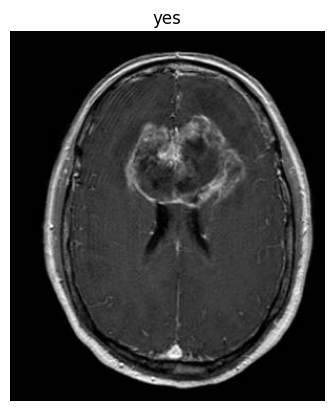

In [ ]:
#View a ra random image form the dataset
img = view_random_image('/content/brain_tumor_dataset', target_class='yes')

Image shape: (214, 235, 3)


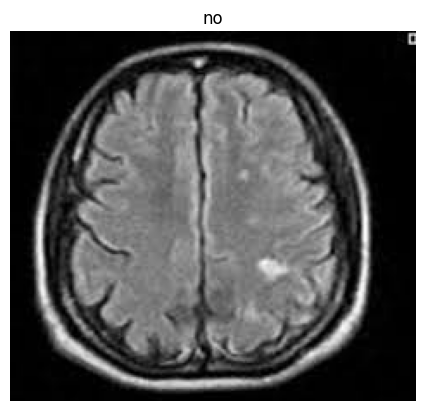

In [ ]:
#View a ra random image form the dataset
img = view_random_image('/content/brain_tumor_dataset', target_class='no')

## Splitting the dataste into training and test data

In [ ]:
# Import required libraries
import os       # For interacting with the file system (e.g., creating directories, listing files)
import shutil   # For copying files from one directory to another
import random   # For shuffling file lists to ensure randomness

def split_dataset_simple(dataset_dir, output_dir, train_ratio=0.8):
    """
    Splits a dataset into train and test folders.

    Parameters:
        dataset_dir (str): Path to the main dataset folder with class subfolders.
        output_dir (str): Path to save the split dataset.
        train_ratio (float): Percentage of data for training (default is 80% training, 20% testing).
    """

    # Create train and test directories inside the output directory
    train_dir = os.path.join(output_dir, 'train')  # Path for the train folder
    test_dir = os.path.join(output_dir, 'test')    # Path for the test folder
    os.makedirs(train_dir, exist_ok=True)          # Create the train folder if it doesn't exist
    os.makedirs(test_dir, exist_ok=True)           # Create the test folder if it doesn't exist

    # Loop through each class folder inside the dataset directory
    for class_name in os.listdir('brain_tumor_dataset'):  # List all items in the dataset directory
        class_path = os.path.join('brain_tumor_dataset', class_name)  # Full path to the current class folder

        # Skip the item if it's not a folder (e.g., skip files)
        if not os.path.isdir(class_path):
            continue

        # Create subfolders for this class in the train and test directories
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # List all files in the current class folder
        files = os.listdir(class_path)  # Get all files (e.g., images) in the class folder
        random.shuffle(files)           # Randomize the order of the files

        # Split the files into training and testing sets
        split_index = int(len(files) * train_ratio)  # Calculate how many files go to the training set
        train_files = files[:split_index]           # First portion goes to training
        test_files = files[split_index:]            # Remaining portion goes to testing

        # Copy the training files to the corresponding train subfolder
        for file_name in train_files:
            # Full path to the file in the original dataset
            src_path = os.path.join(class_path, file_name)
            # Destination path in the train folder
            dest_path = os.path.join(train_dir, class_name, file_name)
            shutil.copy(src_path, dest_path)  # Copy the file

        # Copy the testing files to the corresponding test subfolder
        for file_name in test_files:
            # Full path to the file in the original dataset
            src_path = os.path.join(class_path, file_name)
            # Destination path in the test folder
            dest_path = os.path.join(test_dir, class_name, file_name)
            shutil.copy(src_path, dest_path)  # Copy the file

    # Print a success message after all files are split
    print("Dataset split successfully!")

# Example usage of the function
split_dataset_simple("dataset", "output_dataset", train_ratio=0.8)


Dataset split successfully!


## Preprocessing the datasets

In [ ]:
train= len(os.listdir("/content/output_dataset/train/yes")) + len(os.listdir("/content/output_dataset/train/no"))
train

202

In [ ]:
test= len(os.listdir("/content/output_dataset/test/yes")) + len(os.listdir("/content/output_dataset/test/no"))
test

51

In [ ]:
#Prepocessing the train dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Data Generator with Augmentation
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.2,
    width_shift_range =0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    '/content/output_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)




Found 202 images belonging to 2 classes.


Found 202 images belonging to 2 classes.


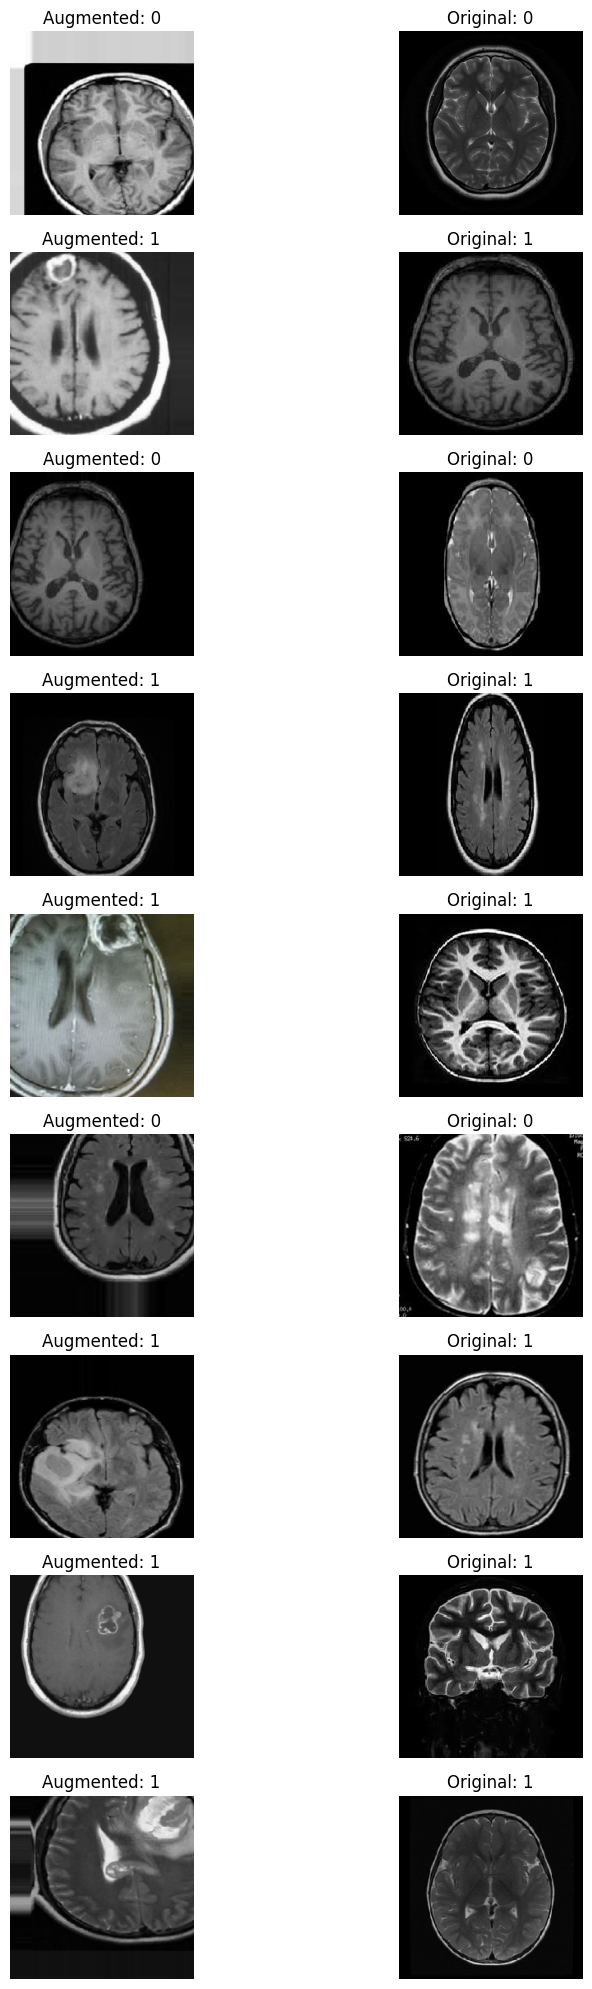

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

imgs, labels = next(train_data)

# Assuming 'imgs' contains the augmented images

# Get a batch of original images (without augmentation)
original_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for originals
original_data = original_datagen.flow_from_directory(
    '/content/output_dataset/train',  # Same directory as augmented images
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order consistent
)
original_imgs, _ = next(original_data)

# Display augmented and original images side-by-side
fig, axes = plt.subplots(9, 2, figsize=(10, 20))  # 9 rows, 2 columns for comparison

for i in range(9):
    # Augmented image
    axes[i, 0].imshow(imgs[i])
    axes[i, 0].set_title(f"Augmented: {np.argmax(labels[i])}")
    axes[i, 0].axis('off')

    # Original image
    axes[i, 1].imshow(original_imgs[i])
    axes[i, 1].set_title(f"Original: {np.argmax(labels[i])}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Preprocessing the test dataset
# Initialize the ImageDataGenerator without any augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/output_dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 51 images belonging to 2 classes.


## Building CNN

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile and train the model
model.compile(optimizer = 'adam',
              loss = 'CategoricalCrossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.6521 - loss: 0.6473 - val_accuracy: 0.6667 - val_loss: 0.6486
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.6235 - loss: 0.6571 - val_accuracy: 0.7059 - val_loss: 0.5655
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.6804 - loss: 0.6157 - val_accuracy: 0.7647 - val_loss: 0.5274
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.7331 - loss: 0.5794 - val_accuracy: 0.8235 - val_loss: 0.5010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.6851 - loss: 0.5756 - val_accuracy: 0.7059 - val_loss: 0.5938
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6923 - loss: 0.5724 - val_accuracy: 0.7451 - val_loss: 0.5399
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6904 - loss: 0.6098 - val_accuracy: 0.7647 - val_loss: 0.5318
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.6146 - loss: 0.6446 - val_accuracy: 0.7843 - val_loss: 0.5569
Epoch 9/

## Evaluate the model

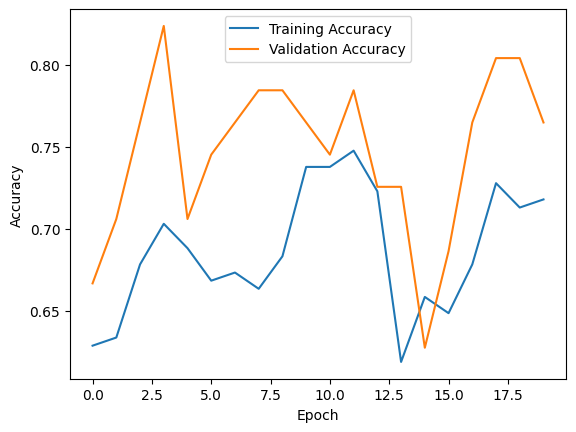

In [ ]:
#Evalauting the model using a graph for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

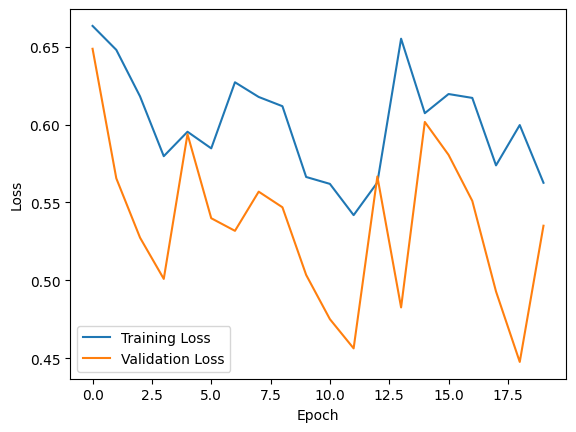

In [ ]:
#Evalauting the model using a graph for loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
